# Feature Selection

We have cleaned data ready for modelling, but we need to select the features. We want to remove any outliers and find any correlation with other features. we can use the colinearity to remove features that wont add value.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data and infer the date format for the date features

sport = pd.read_csv('Bikesales_Features.csv', 
                  parse_dates=['First_Seen','Last_Seen','Last_Modified'], 
                  dtype={'Postcode': 'category'},
                  dayfirst=True)
#sport = df[df['Body'] == 'Super Sport'].reset_index(drop=True)
#sport.drop(['Description'],axis=1,inplace=True)
sport.head()

,ABS,Adjustable_Seat,Bore,Cam_Type,Carburettor,Charging_Method,Clutch_Type,Colour,Compression_Ratio,Cooling,...,Wheelbase,Width,Seller,Brand,Remaining_Warranty,Remaining_Registration,Age,Live_Add,Sold,Engine_Size
0,Standard,No,78.0,DOHC_(Double_Over_Head_Cam),Electronic_fuel_injection,Engine,Multi_plate,black,13.0,Liquid,...,1420.0,735.000,Private,Aprilia,93,1,8,11.0,Sold,950
1,Standard,No,78.0,DOHC_(Double_Over_Head_Cam),Electronic_fuel_injection,Engine,Multi_plate,yellow,13.0,Liquid,...,1420.0,735.000,Private,Aprilia,81,0,7,11.0,Sold,950
2,Standard,No,78.0,DOHC_(Double_Over_Head_Cam),Electronic_fuel_injection,Engine,Other,black,13.0,Liquid,...,1443.0,720.385,Private,Aprilia,57,0,5,69.0,Sold,950
3,Standard,No,78.0,DOHC_(Double_Over_Head_Cam),Electronic_fuel_injection,Engine,Other,black,13.0,Liquid,...,1443.0,720.385,Private,Aprilia,57,0,5,69.0,Sold,950
4,Standard,No,78.0,DOHC_(Double_Over_Head_Cam),Electronic_fuel_injection,Engine,Other,black,13.0,Liquid,...,1443.0,720.385,Private,Aprilia,57,0,5,69.0,Sold,950


In [3]:
print (sport.shape)
print (sport.columns)


(3914, 79)
Index(['ABS', 'Adjustable_Seat', 'Bore', 'Cam_Type', 'Carburettor',
       'Charging_Method', 'Clutch_Type', 'Colour', 'Compression_Ratio',
       'Cooling', 'Country_of_Origin', 'Cylinders', 'Drive_Type', 'Dry_Weight',
       'Engine_Config', 'Engine_Type', 'Engine_Voltage', 'Exhaust_Config',
       'First_Seen', 'Frame_Material', 'Front_Brake_Caliper(s)',
       'Front_Brake_Description', 'Front_Brake_Diameter', 'Front_Suspension',
       'Front_Suspension_Travel', 'Fuel_Tank_Capacity', 'Gear_Change_Method',
       'Gear_Number', 'Gear_Type', 'Ground_Clearance', 'Height', 'Ignition',
       'Kilometers', 'Last_Modified', 'Last_Seen', 'Learner_Approved',
       'Length', 'Linked_Braking_System', 'Maximum_Power', 'Maximum_Power_RPM',
       'Maximum_Torque', 'Maximum_Torque_RPM', 'Model', 'Postcode', 'Price',
       'Rake_(Caster_Angle)', 'Rear_Brake_Caliper(s)',
       'Rear_Brake_Description', 'Rear_Brake_Diameter', 'Rear_Suspension',
       'Rear_Suspension_Travel', 'Reco

## Remove Outliers

Remove outliers that are 3$\sigma$ from the mean of each feature.

In [4]:
def remove_outliers(df):
    
    subset = df.select_dtypes(include='number')
    # Calculate the z score
    z = np.abs(stats.zscore(subset))
    # convert into a dataframe
    z = pd.DataFrame(z,columns=subset.columns)

    # Add in the categorical features before removeing outliers
    for col in df.select_dtypes(exclude='number').columns:
        z[col] = 0

    z.fillna(0,inplace=True)
        
    # Order the feature list to the z value feature list
    subset = df[z.columns]
    # Filter out the outliers
    subset_o = subset[(z < 3).all(axis=1)]

    return subset_o

In [5]:
sport = remove_outliers(sport)
sport.reset_index(drop=True, inplace=True)
sport.shape

(2642, 79)

In [6]:
sport.head()

,Bore,Compression_Ratio,Cylinders,Dry_Weight,Engine_Voltage,Front_Brake_Diameter,Front_Suspension_Travel,Fuel_Tank_Capacity,Gear_Number,Ground_Clearance,...,Starter,State,Suburb,Swingarm_Type,Traction_Control,URL,Wheel_Type,Seller,Brand,Sold
0,78.0,13.0,4.0,179.0,12.0,320.0,120.0,17.0,6.0,130.0,...,Electric,NSW,Whitebridge,Dual_Sided,Standard,https://www.bikesales.com.au/bikes/details/201...,Spoke,Private,Aprilia,Sold
1,78.0,13.0,4.0,179.0,12.0,320.0,120.0,17.0,6.0,130.0,...,Electric,WA,Southern_river,Dual_Sided,Standard,https://www.bikesales.com.au/bikes/details/201...,Spoke,Private,Aprilia,Sold
2,78.0,13.0,4.0,181.0,12.0,320.0,120.0,18.5,6.0,130.0,...,Electric,NSW,Glebe,Dual_Sided,Standard,https://www.bikesales.com.au/bikes/details/201...,Spoke,Private,Aprilia,Sold
3,78.0,13.0,4.0,181.0,12.0,320.0,120.0,18.5,6.0,130.0,...,Electric,NSW,Epping,Dual_Sided,Standard,https://www.bikesales.com.au/bikes/details/201...,Spoke,Private,Aprilia,Sold
4,78.0,13.0,4.0,181.0,12.0,320.0,120.0,18.5,6.0,130.0,...,Electric,SA,Encounter_bay,Dual_Sided,Standard,https://www.bikesales.com.au/bikes/details/201...,Spoke,Private,Aprilia,Sold


# Remove Colinear Features

Find the correlation between each feature.

In [7]:
def display_correlation_matrix(df):
    corr_matrix = df.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True

    f, ax = plt.subplots(figsize=(14, 15)) 
    
    heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,
                          cmap = 'coolwarm', cbar_kws = {'shrink': .6, 'ticks' : [-1, -.5, 0, 0.5, 1]}, 
                          vmin = -1, vmax = 1)

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0, fontsize=16)
    ax.set_xticklabels(corr_matrix.columns, fontsize=16);


(2642, 79)

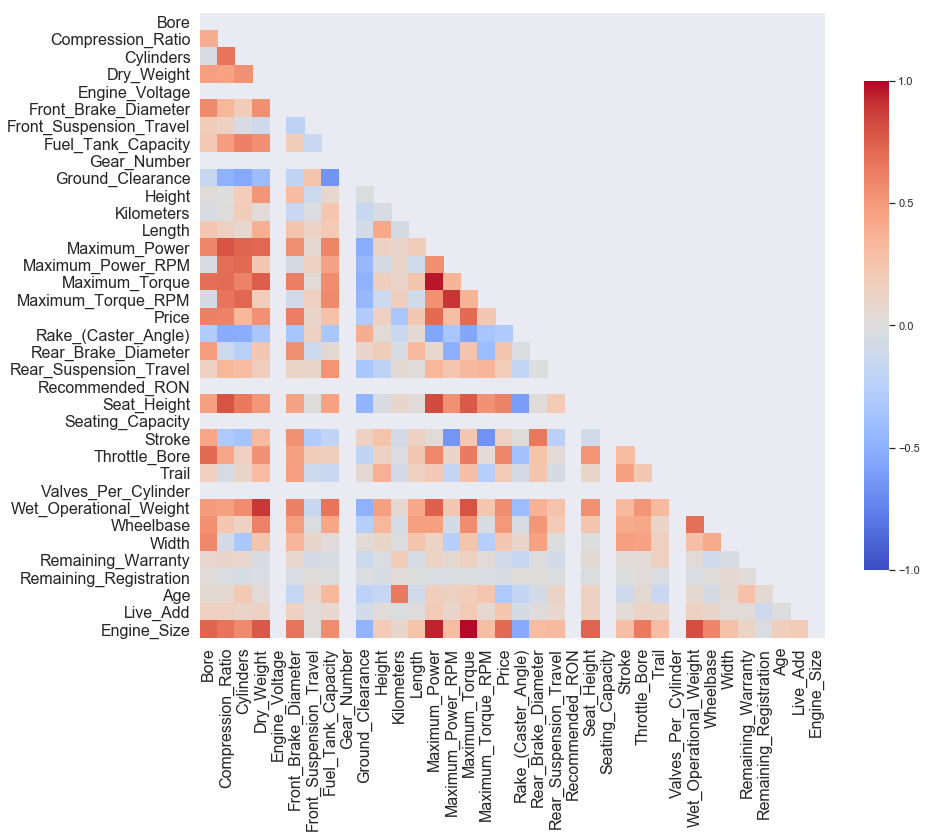

In [8]:
display_correlation_matrix(sport)
sport.shape


Find features with a high colinearity.

In [9]:
def find_Colinear_Features(df, target, threshold = 0.8):
    drop_list = []

    for col1 in df.select_dtypes(include='number').columns:
        for col2 in df.select_dtypes(include='number').columns:
            if (col1 == col2):
                continue

            correlation = abs(df[col1].corr(df[col2]))

            if correlation > threshold:
                
                col1_corr = abs(df[col1].corr(df[target]))
                col2_corr = abs(df[col2].corr(df[target]))
                
                #print (col1, col1_corr, col2, col2_corr)
                if col1_corr > col2_corr:
                    drop_list.append(col2)
                    
                else:
                    drop_list.append(col1)


    return list(set(drop_list))


drop_list = find_Colinear_Features(sport, 'Price', threshold = 0.8)
drop_list

['Seat_Height',
 'Wet_Operational_Weight',
 'Maximum_Power',
 'Maximum_Torque_RPM',
 'Dry_Weight',
 'Maximum_Torque']

In [10]:
# Remove the identified features with a high colinearity with other non target features.

#sport.drop(list(set(drop_list)),axis=1,inplace=True)

remove = ['Maximum_Torque', 'Maximum_Torque_RPM', 'Dry_Weight', 'Seat_Height']#, 'Maximum_Power']
sport.drop(remove, axis=1, inplace=True)


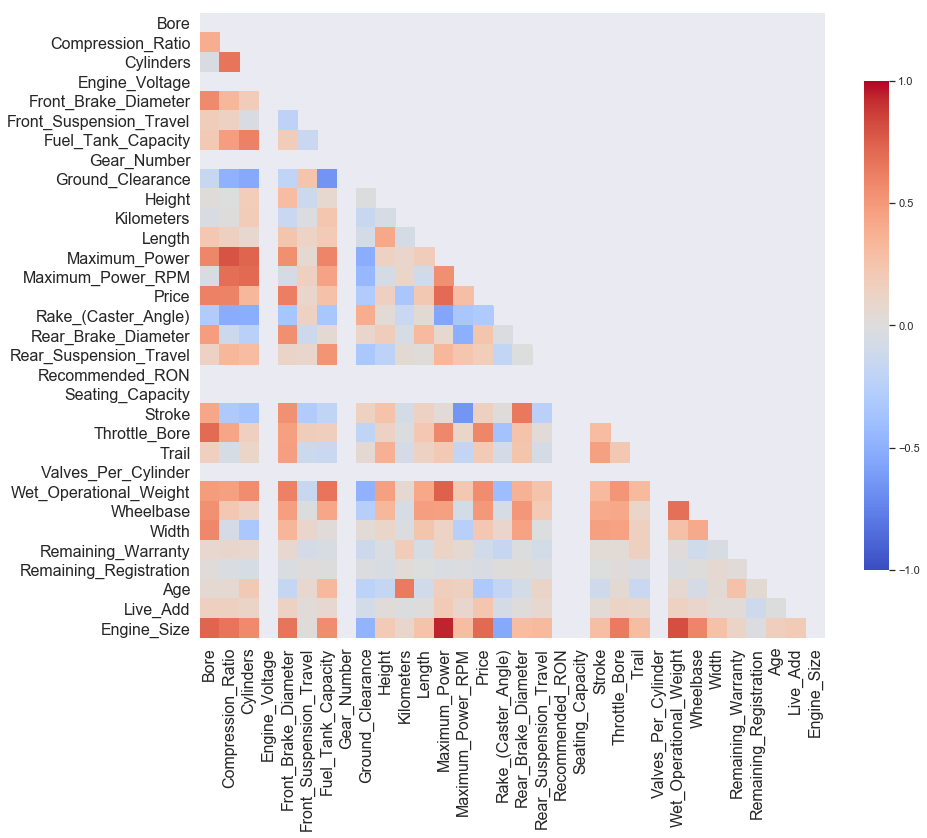

In [11]:
display_correlation_matrix(sport)



In [12]:
# remove = []
# for col in sport.columns:
#     if len(sport[col].unique()) == 1:
#         remove.append(col)
        

# sport.drop(remove,axis=1,inplace=True)


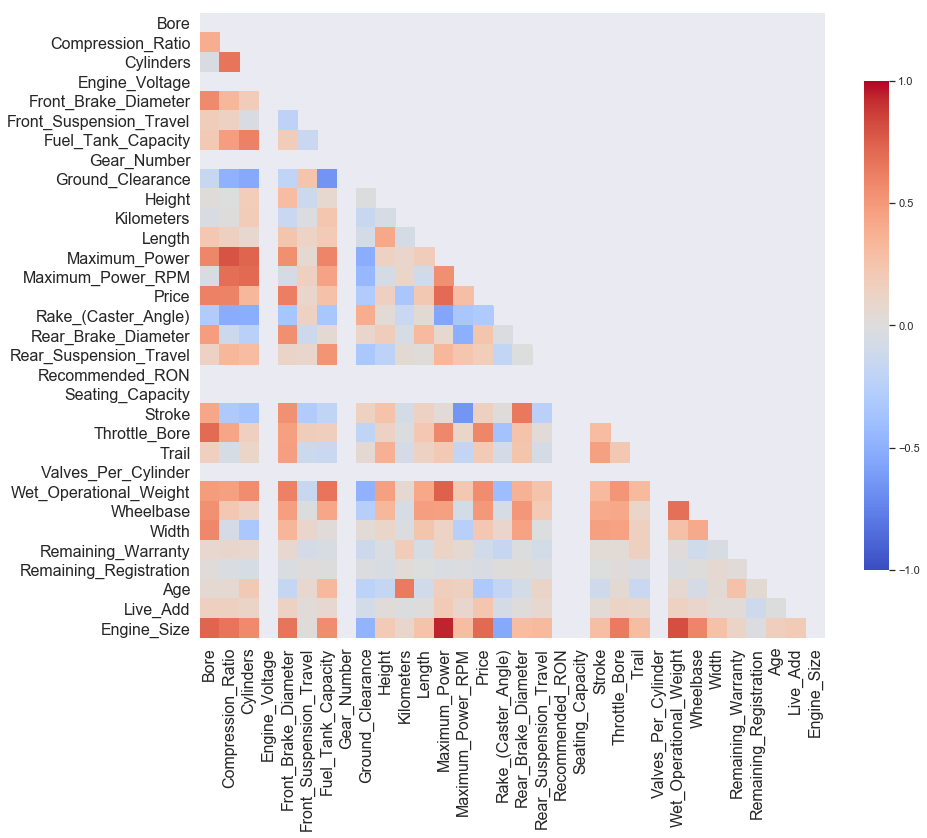

In [13]:
display_correlation_matrix(sport)



In [14]:
sport.shape

(2642, 75)

Write the final cleaned data to file.

In [15]:
sport.to_csv('clean_sport.csv',index=False)

## Helper functions

Additional helper functions for EDA, feature selection

In [16]:
def scatter(data,x,y,hue=None,title='',figsize=(12,10)):
    ax = plt.figure(figsize=figsize)
    sns.scatterplot(x=x,y=y,hue=hue,data=data);
    plt.title(title,fontsize=18)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



def count_plot(data, feature,figsize=(12,10)):
    ax = data[feature].value_counts().sort_values().plot(kind='bar',figsize=figsize);
    ax.set_xlabel(feature);
    ax.set_ylabel('Counts');
    ax.set_title('Distribution of '+feature);
  


In [17]:
@interact
def plot_counts(column=sport.select_dtypes(exclude='number')):
    # remove the description 
    #column = set(list(sport.select_dtypes(exclude='number').columns)) - set(['Description'])
    
    (sport[column].value_counts(normalize=True)*100).plot(kind='bar',figsize=(12,10))
    plt.title('Distribution of Bikes',fontsize=24)
    plt.xlabel(column,fontsize=18)
    plt.ylabel('% of Bikes',fontsize=18)
    
# 'Top_Box', 'Starter','Seating_Position', 'SaddleBags_Panniers','Learner_Approved','Engine_Type','Body'

interactive(children=(Dropdown(description='column', options=('ABS', 'Adjustable_Seat', 'Cam_Type', 'Carburett…

In [18]:
@interact
def plot_counts(Feature=sport.select_dtypes(include='number')):
    # remove the description 
    #column = set(list(sport.select_dtypes(exclude='number').columns)) - set(['Description'])
    correlation = sport[Feature].corr(sport['Price'])
    ax = sns.jointplot(Feature,'Price', data=sport, kind='reg')
    plt.gcf().set_size_inches(10,10)
    ax.annotate(stats.pearsonr,fontsize=12)
    plt.suptitle('Relationship to Price',x=0.5,y=1.01,size=24)
    plt.xlabel(Feature,fontsize=18)
    plt.ylabel('Price',fontsize=18)


interactive(children=(Dropdown(description='Feature', options=('Bore', 'Compression_Ratio', 'Cylinders', 'Engi…

In [19]:
@interact
def plot_counts(x=sport.select_dtypes(include='number'),
                y=sport.select_dtypes(include='number'),
                Hue=sport.columns):
    # remove the description 
    #column = set(list(sport.select_dtypes(exclude='number').columns)) - set(['Description'])
    correlation = sport[x].corr(sport[y])
    ax = sns.scatterplot(x=x,y=y, hue=Hue, data=sport)
    plt.gcf().set_size_inches(10,10)
    #ax.annotate(stats.pearsonr,xytext=(0.9,0.9))
    plt.suptitle('Relationship to Price',size=24)
    plt.xlabel(x,fontsize=18)
    plt.ylabel(y,fontsize=18)

interactive(children=(Dropdown(description='x', options=('Bore', 'Compression_Ratio', 'Cylinders', 'Engine_Vol…

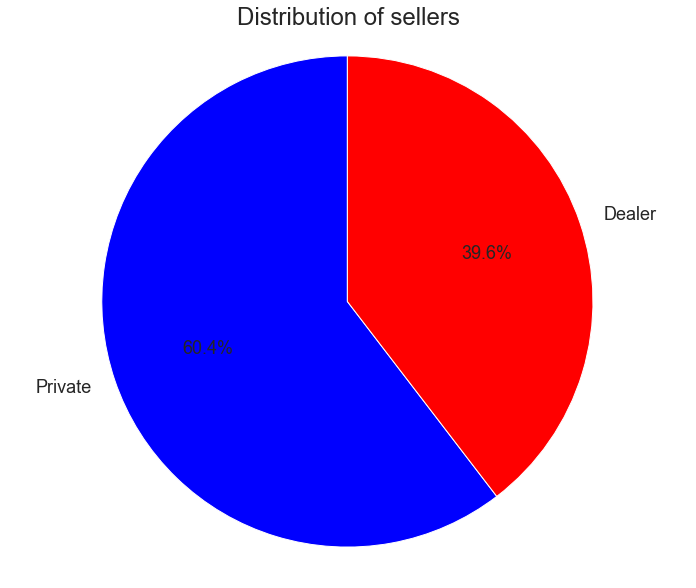

In [20]:
# Seller Distribution figure
plt.figure(figsize=(12,10))
plt.pie(list(sport['Seller'].value_counts(normalize=True)*100), labels=['Private','Dealer'], 
        colors=['blue', 'red'], autopct='%1.1f%%',startangle=90, textprops={'fontsize': 18})

plt.axis('equal')
plt.title('Distribution of sellers',fontsize=24)
plt.show()

In [21]:
list(sport['Seller'].value_counts(normalize=True)*100)

[60.40878122634368, 39.59121877365632]